<a href="https://colab.research.google.com/github/BoneZhou/Application-of-AI/blob/main/class/class03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

In [ ]:
import cv2 # opencv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "./drive/MyDrive/Colab-Notebooks/Application-of-AI/class03/tiger.jpg"

In [ ]:
image = cv2.imread(path)

In [ ]:
print(type(image))
print(image.shape) # h, w, c
print(image)

<class 'numpy.ndarray'>
(5472, 3648, 3)
[[[ 72  76  81]
  [ 69  73  78]
  [ 63  67  72]
  ...
  [ 58  62  67]
  [ 76  80  85]
  [ 62  66  71]]

 [[ 76  80  85]
  [ 89  93  98]
  [ 90  94  99]
  ...
  [ 49  53  58]
  [ 64  68  73]
  [ 67  71  76]]

 [[ 81  85  90]
  [ 90  94  99]
  [ 81  85  90]
  ...
  [ 56  59  67]
  [ 55  58  66]
  [ 62  65  73]]

 ...

 [[187 191 192]
  [192 197 198]
  [183 187 188]
  ...
  [138 143 158]
  [101 104 119]
  [ 71  74  88]]

 [[190 195 196]
  [196 204 204]
  [186 191 192]
  ...
  [118 123 138]
  [104 107 122]
  [ 83  86 101]]

 [[177 185 185]
  [194 202 202]
  [192 200 200]
  ...
  [114 118 136]
  [106 109 124]
  [ 97 100 115]]]


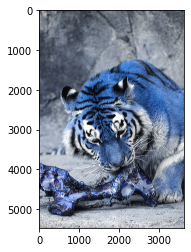

In [ ]:
plt.imshow(image) # cv2 (B, G, R)
plt.show()

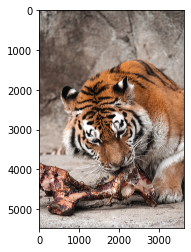

In [ ]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)
plt.show()

# iterable vs iterator

In [ ]:
nums = [1, 2, 3, 4, 5] # iterable
# for n in nums:
#   print(n)
print(dir(nums)) # __iter__ => iterable

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [ ]:
#print(next(nums)) # __next__

TypeError: ignored

In [ ]:
i_nums = iter(nums) # nums.__iter__()
print(i_nums)
print(dir(i_nums))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']


In [ ]:
print(next(i_nums))

1


In [ ]:
print(next(i_nums))
print(next(i_nums))
print(next(i_nums))
print(next(i_nums))

2
3
4
5


In [ ]:
print(next(i_nums))

StopIteration: ignored

# Feed Forward Neural Network (Fully connected Neural Network)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F


# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# hyperparamter
BATCH_SIZE = 64
num_classes = 10
epochs = 10
learning_rate = 1e-4 # 0.0001

## Dataset

In [ ]:
# Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
print(dir(train_loader))

['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_get_shared_seed', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']


In [ ]:
iterator = iter(train_loader)

In [ ]:
print(iterator.next()) # images, labels

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
images, labels = next(iterator)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [ ]:
print(images,labels)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

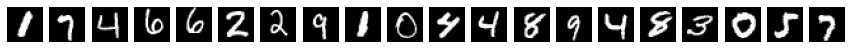

In [ ]:
fig, axes = plt.subplots(1,20, figsize=(15, 15))
for i in range(20):
  axes[i].imshow(images[i][0], cmap = 'gray')
  axes[i].set_axis_off()
fig.show()

## Model

In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, h1, h2, num_classes):
    super().__init__()
    self.f1 = nn.Linear(input_size, h1)
    self.f2 = nn.Linear(h1, h2)
    self.f3 = nn.Linear(h2, num_classes)

  def forward(self, x):
    x = F.relu(self.f1(x))
    x = F.relu(self.f2(x))
    out = self.f3(x)
    return out

In [ ]:
input_size = 784
h1 = 256
h2 = 128
net = Net(input_size=input_size, h1=h1, h2=h2, num_classes=num_classes).to(device) # GPU

In [ ]:
[p.numel() for p in net.parameters() if p.requires_grad]

[200704, 256, 32768, 128, 1280, 10]

In [ ]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
# training loop
total_steps = len(train_loader)
for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 32, 1, 28, 28
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    outputs = net(images)
    loss = criterion(outputs, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print (f'Epoch {epoch+1}, Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

Epoch 1, Step [100/938], Loss: 1.7250
Epoch 1, Step [200/938], Loss: 0.7970
Epoch 1, Step [300/938], Loss: 0.6620
Epoch 1, Step [400/938], Loss: 0.5453
Epoch 1, Step [500/938], Loss: 0.3586
Epoch 1, Step [600/938], Loss: 0.3491
Epoch 1, Step [700/938], Loss: 0.4088
Epoch 1, Step [800/938], Loss: 0.2464
Epoch 1, Step [900/938], Loss: 0.3624
Epoch 2, Step [100/938], Loss: 0.5486
Epoch 2, Step [200/938], Loss: 0.3023
Epoch 2, Step [300/938], Loss: 0.3219
Epoch 2, Step [400/938], Loss: 0.4700
Epoch 2, Step [500/938], Loss: 0.3057
Epoch 2, Step [600/938], Loss: 0.3918
Epoch 2, Step [700/938], Loss: 0.3043
Epoch 2, Step [800/938], Loss: 0.3479
Epoch 2, Step [900/938], Loss: 0.1634
Epoch 3, Step [100/938], Loss: 0.1482
Epoch 3, Step [200/938], Loss: 0.2423
Epoch 3, Step [300/938], Loss: 0.1904
Epoch 3, Step [400/938], Loss: 0.2654
Epoch 3, Step [500/938], Loss: 0.2711
Epoch 3, Step [600/938], Loss: 0.3631
Epoch 3, Step [700/938], Loss: 0.5421
Epoch 3, Step [800/938], Loss: 0.2500
Epoch 3, Ste

In [ ]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = net(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 96.77 %
